In [2]:
import sagemaker

session = sagemaker.Session(default_bucket = "demo-ouptut-bucket", default_bucket_prefix = "Endpoint/") 
# default_bucket_prefix is not available in older versions of SageMaker
role = sagemaker.get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [3]:
sagemaker.__version__

'2.184.0'

# Sci-kit Learn

In [ ]:
# See this link to get the idea on how to get predictions from a SageMaker Scikit-Learn Endpoint: 
# https://stackoverflow.com/questions/63568274/how-to-use-serializer-and-deserializer-in-sagemaker-2

In [3]:
image_url = "720646828776.dkr.ecr.ap-south-1.amazonaws.com/sagemaker-scikit-learn:1.0-1-cpu-py3"
model_data_url = "s3://demo-output-bucket/Training_Pipeline_Output/2023-09-08T07:35:39.843Z/HPTuningOutputs/Decision_Tree/gxvc0dt117zh-hptuning-cQVa6D6efJ-001-3a4cf63d/output/model.tar.gz"
instance_type = "ml.c5.xlarge"

In [4]:
from sagemaker.model import Model
model = Model(
    entry_point = "Evaluation.py",
    source_dir = "code", 
    role = role,
    image_uri = image_url,
    model_data = model_data_url
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [5]:
predictor = model.deploy(initial_instance_count=1, instance_type=instance_type, endpoint_name = "churn-endpoint-12345")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
---!

In [16]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer
predictor = sagemaker.predictor.Predictor(endpoint_name = "churn-endpoint-12345",
                                          serializer = CSVSerializer(),
                                          # content_type  = "text/csv"
                                         )

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [17]:
import pandas as pd
s3 = pd.read_csv("s3://demo-output-bucket/Training_Pipeline_Output/2023-08-02T06:55:59.009Z/TrainProcessingOutput/test.csv")
s3 = s3.drop(columns = ["Churn"])

In [18]:
result = predictor.predict(s3)
result

b'{"0": {"0": 1, "1": 0, "2": 0, "3": 1, "4": 0, "5": 0, "6": 0, "7": 0, "8": 0, "9": 0, "10": 0, "11": 0, "12": 0, "13": 0, "14": 0, "15": 1, "16": 1, "17": 0, "18": 1, "19": 0, "20": 0, "21": 0, "22": 0, "23": 0, "24": 0, "25": 0, "26": 0, "27": 0, "28": 0, "29": 0, "30": 0, "31": 0, "32": 0, "33": 0, "34": 0, "35": 0, "36": 0, "37": 0, "38": 0, "39": 0, "40": 0, "41": 0, "42": 1, "43": 0, "44": 0, "45": 0, "46": 1, "47": 0, "48": 0, "49": 0, "50": 0, "51": 0, "52": 0, "53": 0, "54": 0, "55": 0, "56": 0, "57": 1, "58": 0, "59": 0, "60": 0, "61": 0, "62": 0, "63": 0, "64": 0, "65": 0, "66": 0, "67": 0, "68": 0, "69": 0, "70": 1, "71": 0, "72": 1, "73": 0, "74": 0, "75": 0, "76": 0, "77": 0, "78": 0, "79": 0, "80": 0, "81": 0, "82": 0, "83": 0, "84": 0, "85": 0, "86": 0, "87": 1, "88": 0, "89": 0, "90": 0, "91": 0, "92": 0, "93": 0, "94": 0, "95": 0, "96": 0, "97": 0, "98": 0, "99": 0, "100": 0, "101": 0, "102": 0, "103": 0, "104": 0, "105": 0, "106": 0, "107": 0, "108": 0, "109": 0, "

# Tensorflow

In [19]:
instance_type = "ml.c5.xlarge"

# model_data_url = "s3://sagemaker-ap-south-1-720541911643/tensorflow-training-2023-10-03-12-32-37-552/output/model.tar.gz" # CIFAR10
model_data_url = "s3://sagemaker-ap-south-1-720541911643/231010-062452-Fashion-Mnist-m5-xlarge-cpu-100e/output/model.tar.gz" # MNIST fashion

# image_url = "763104351884.dkr.ecr.ap-south-1.amazonaws.com/tensorflow-serving:1.15.2-cpu-py3" 
image_url = "520713654638.dkr.ecr.ap-south-1.amazonaws.com/tensorflow-inference:1.14.0"

In [20]:
from sagemaker.tensorflow import TensorFlowModel

model = TensorFlowModel(model_data=model_data_url, 
                        role = role, 
                        framework_version = "1.15.2", 
                        entry_point = "inference.py", 
                        source_dir = "code"
                       )

predictor = model.deploy(initial_instance_count=1, instance_type=instance_type, endpoint_name = "tensorflow-inference-fashion-mnist-111")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
---!

In [21]:
from sagemaker.serializers import JSONSerializer
predictor = sagemaker.predictor.Predictor(endpoint_name = "tensorflow-inference-fashion-mnist-111",
                                          serializer = JSONSerializer(),
                                          # content_type  = "text/csv"
                                         )

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [22]:
import numpy as np
random_array = np.random.randn(28, 28)

In [23]:
random_list = random_array.tolist()

In [24]:
inputs= {'instances': random_list}
result = predictor.predict(inputs)

In [25]:
result

b'{\n    "predictions": [[0.0228216853, 0.0247749537, 0.555821061, 0.127348363, 0.044581335, 0.10335166, 0.0753519163, 0.0224879533, 0.00874781609, 0.0147132706]\n    ]\n}'

In [12]:
!pwd

/root/Endpoint


In [26]:
(x_train, y_train), (x_test, y_test) = np.load("fashion_mnist.npy", allow_pickle = True)

In [27]:
inputs= {'instances': x_test[0].tolist()}
result = predictor.predict(inputs)

In [28]:
result

b'{\n    "predictions": [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]\n    ]\n}'

In [21]:
result

{'predictions': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}

In [22]:
y_test[0]

9

In [23]:
inputs= {'instances': [x_test[0].tolist(), x_test[1].tolist()]}
result = predictor.predict(inputs)

In [24]:
result

{'predictions': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}

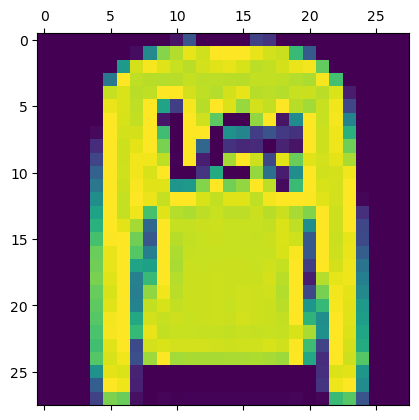

In [26]:
import matplotlib.pyplot as plt
plt.matshow(x_test[1])

In [27]:
inputs= {'instances': [x_test[0].tolist(), x_test[1].tolist(), x_test[2].tolist(), x_test[3].tolist()]}
result = predictor.predict(inputs)

In [28]:
result

{'predictions': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}

In [33]:
inputs= {'instances': x_train[1].tolist()}
result = predictor.predict(inputs)

In [34]:
result

{'predictions': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}

In [31]:
data_list = [x_test[i].tolist() for i in range(x_test.shape[0])]

In [32]:
inputs= {'instances': data_list}
result = predictor.predict(inputs)

SSLError: SSL validation failed for https://runtime.sagemaker.ap-south-1.amazonaws.com/endpoints/tensorflow-inference-fashion-mnist-111/invocations EOF occurred in violation of protocol (_ssl.c:2396)

# XGBoost

In [3]:
xgboost_model = sagemaker.model.Model(
    entry_point = "Evaluation.py",
    source_dir = "xgboost_code",
    model_data = "s3://demo-output-bucket/Training_Pipeline_Output/2023-10-12T05:27:07.540Z/HPTuningOutputs/XGBoost/m8ntjjxczrtg-hptuning-s97nZ4rIEC-001-e899812f/output/model.tar.gz",
    image_uri = "720646828776.dkr.ecr.ap-south-1.amazonaws.com/sagemaker-xgboost:1.0-1-cpu-py3",
    role = role
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [5]:
predictor = xgboost_model.deploy(initial_instance_count=1, instance_type="ml.c5.xlarge", endpoint_name = "xgboost-endpoint-12345")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
----!

In [7]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer
predictor = sagemaker.predictor.Predictor(endpoint_name = "xgboost-endpoint-12345",
                                          serializer = CSVSerializer(),
                                          # content_type  = "text/csv"
                                         )

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [8]:
import pandas as pd
s3 = pd.read_csv("s3://demo-inputs-bucket/Batch_Data/Batch_Data.csv")


result = predictor.predict(s3)
result

b'{"0": {"0": 1, "1": 0, "2": 0, "3": 1, "4": 1, "5": 0, "6": 0, "7": 0, "8": 0, "9": 0, "10": 0, "11": 0, "12": 0, "13": 0, "14": 0, "15": 1, "16": 1, "17": 0, "18": 1, "19": 0, "20": 0, "21": 0, "22": 0, "23": 0, "24": 0, "25": 0, "26": 0, "27": 0, "28": 0, "29": 0, "30": 0, "31": 0, "32": 0, "33": 0, "34": 0, "35": 0, "36": 0, "37": 0, "38": 0, "39": 0, "40": 0, "41": 0, "42": 1, "43": 0, "44": 0, "45": 0, "46": 1, "47": 0, "48": 0, "49": 0, "50": 0, "51": 0, "52": 0, "53": 0, "54": 0, "55": 0, "56": 0, "57": 1, "58": 0, "59": 0, "60": 0, "61": 0, "62": 0, "63": 0, "64": 0, "65": 0, "66": 0, "67": 0, "68": 0, "69": 1, "70": 1, "71": 0, "72": 1, "73": 0, "74": 0, "75": 0, "76": 0, "77": 0, "78": 0, "79": 0, "80": 0, "81": 0, "82": 0, "83": 0, "84": 0, "85": 0, "86": 0, "87": 1, "88": 0, "89": 0, "90": 0, "91": 0, "92": 0, "93": 0, "94": 0, "95": 0, "96": 0, "97": 0, "98": 0, "99": 0, "100": 0, "101": 0, "102": 0, "103": 0, "104": 0, "105": 0, "106": 0, "107": 0, "108": 0, "109": 0, "